# Chapter 7 ggplot2

Exploratory data visualization is perhaps the greatest strength of R. One can quickly go from idea to data to plot with a unique balance of flexibility and ease. For example, Excel may be easier than R for some plots, but it is nowhere near as flexible. D3.js may be more flexible and powerful than R, but it takes much longer to generate a plot.

Throughout the book, we will be creating plots using the __ggplot2__ package.

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Many other approaches are available for creating plots in R. In fact, the plotting capabilities that come with a basic installation of R are already quite powerful. There are also other packages for creating graphics such as __grid__ and __lattice__. We chose to use __ggplot2__ in this book because it breaks plots into components in a way that permits beginners to create relatively complex and aesthetically pleasing plots using syntax that is intuitive and comparatively easy to remember.

One reason __ggplot2__ is generally more intuitive for beginners is that it uses a grammar of graphics, the _gg_ in __ggplot2__. This is analogous to the way learning grammar can help a beginner construct hundreds of different sentences by learning just a handful of verbs, nouns and adjectives without having to memorize each specific sentence. Similarly, by learning a handful of __ggplot2__ building blocks and its grammar, you will be able to create hundreds of different plots.

Another reason __ggplot2__ is easy for beginners is that its default behavior is carefully chosen to satisfy the great majority of cases and is visually pleasing. As a result, it is possible to create informative and elegant graphs with relatively simple and readable code.

One limitation is that __ggplot2__ is designed to work exclusively with data tables in tidy format (where rows are observations and columns are variables). However, a substantial percentage of datasets that beginners work with are in, or can be converted into, this format. An advantage of this approach is that, assuming that our data is tidy, __ggplot2__ simplifies plotting code and the learning of grammar for a variety of plots.

To use __ggplot2__ you will have to learn several functions and arguments. These are hard to memorize, so we highly recommend you have the ggplot2 cheat sheet handy. You can get a copy here: https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf or simply perform an internet search for “ggplot2 cheat sheet”.

## 7.1 The components of the graph

We will construct a graph that summarizes the US murders dataset that looks like this:

We can clearly see how much states vary across population size and the total number of murders. Not surprisingly, we also see a clear relationship between murder totals and population size. A state falling on the dashed grey line has the same murder rate as the US average. The four geographic regions are denoted with color, which depicts how most southern states have murder rates above the average.

This data visualization shows us pretty much all the information in the data table. The code needed to make this plot is relatively simple. We will learn to create the plot part by part.

The first step in learning __ggplot2__ is to be able to break a graph apart into components. Let’s break down the plot above and introduce some of the __ggplot2__ terminology. The main three components to note are:

* __Data__: The US murders data table is being summarized. We refer to this as the __data__ component.
* __Geometry__: The plot above is a scatterplot. This is referred to as the __geometry__ component. Other possible geometries are barplot, histogram, smooth densities, qqplot, and boxplot. We will learn more about these in the Data Visualization part of the book.
* __Aesthetic mapping__: The plot uses several visual cues to represent the information provided by the dataset. The two most important cues in this plot are the point positions on the x-axis and y-axis, which represent population size and the total number of murders, respectively. Each point represents a different observation, and we map data about these observations to visual cues like x- and y-scale. Color is another visual cue that we map to region. We refer to this as the __aesthetic mapping__ component. How we define the mapping depends on what __geometry__ we are using.
We also note that:

* The points are labeled with the state abbreviations.
* The range of the x-axis and y-axis appears to be defined by the range of the data. They are both on log-scales.
* There are labels, a title, a legend, and we use the style of The Economist magazine.
We will now construct the plot piece by piece.

We start by loading the dataset:


In [2]:
library(dslabs)
data(murders)

## 7.2 `ggplot` objects

The first step in creating a __ggplot2__ graph is to define a `ggplot` object. We do this with the function `ggplot`, which initializes the graph. If we read the help file for this function, we see that the first argument is used to specify what data is associated with this object:

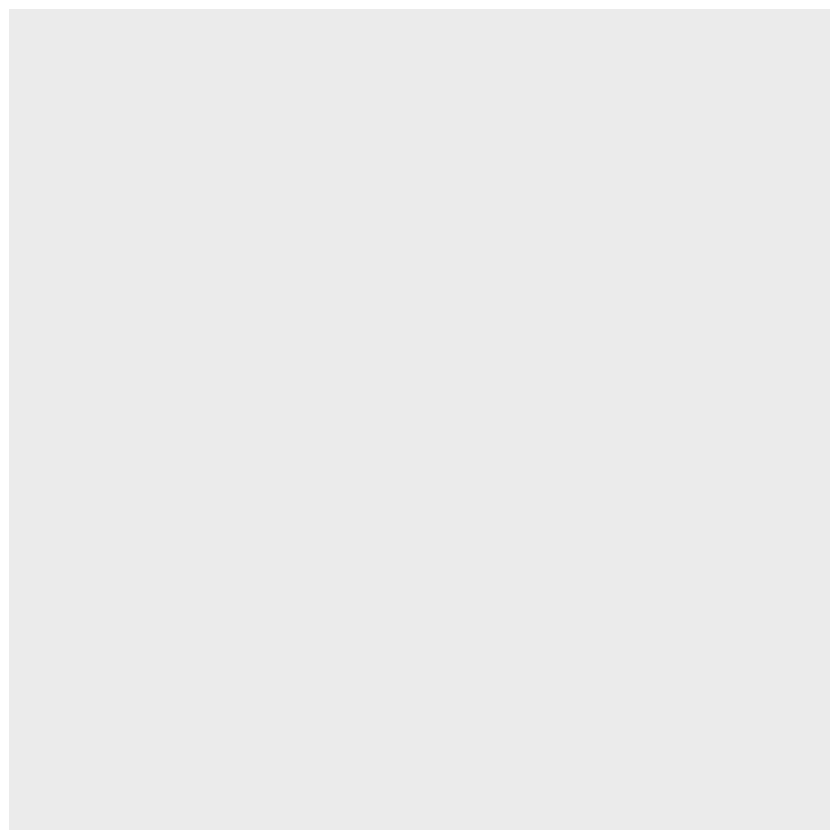

In [4]:
ggplot(data = murders)

We can also pipe the data in as the first argument. So this line of code is equivalent to the one above:

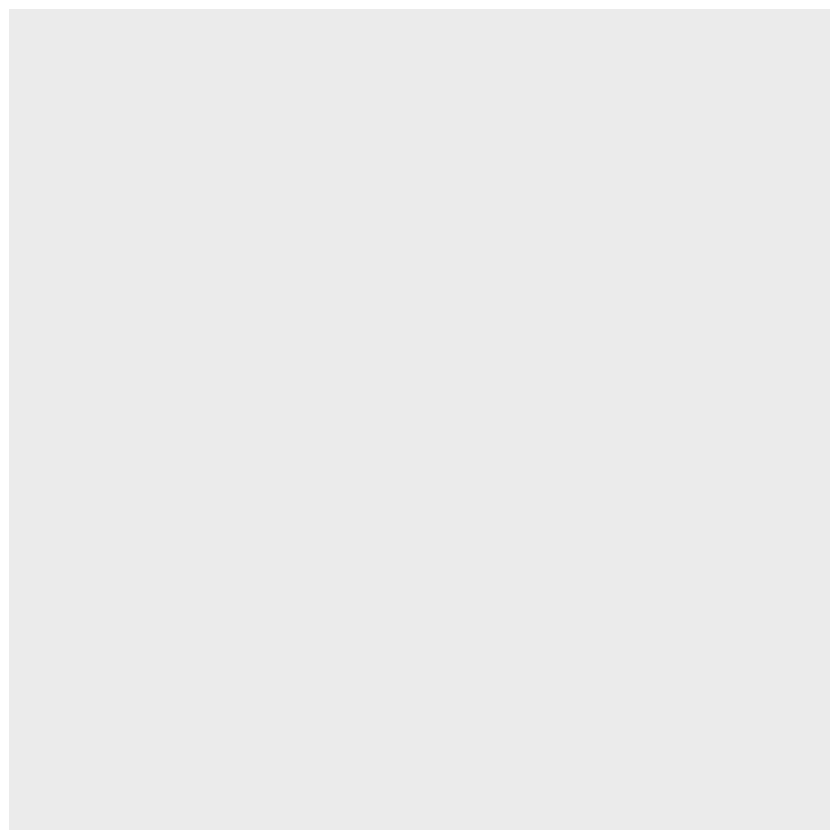

In [6]:
murders %>% ggplot()

It renders a plot, in this case a blank slate since no geometry has been defined. The only style choice we see is a grey background.

What has happened above is that the object was created and, because it was not assigned, it was automatically evaluated. But we can assign our plot to an object, for example like this:

In [7]:
p <- ggplot(data = murders)
class(p)

[1] "gg"     "ggplot"

To render the plot associated with this object, we simply print the object `p`. The following two lines of code each produce the same plot we see above:

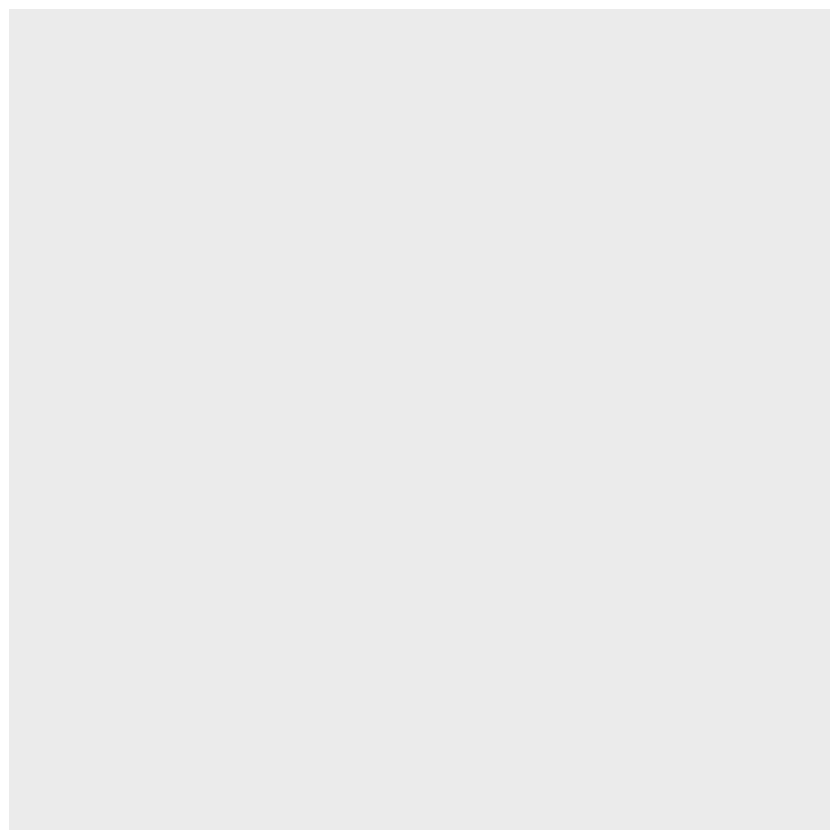

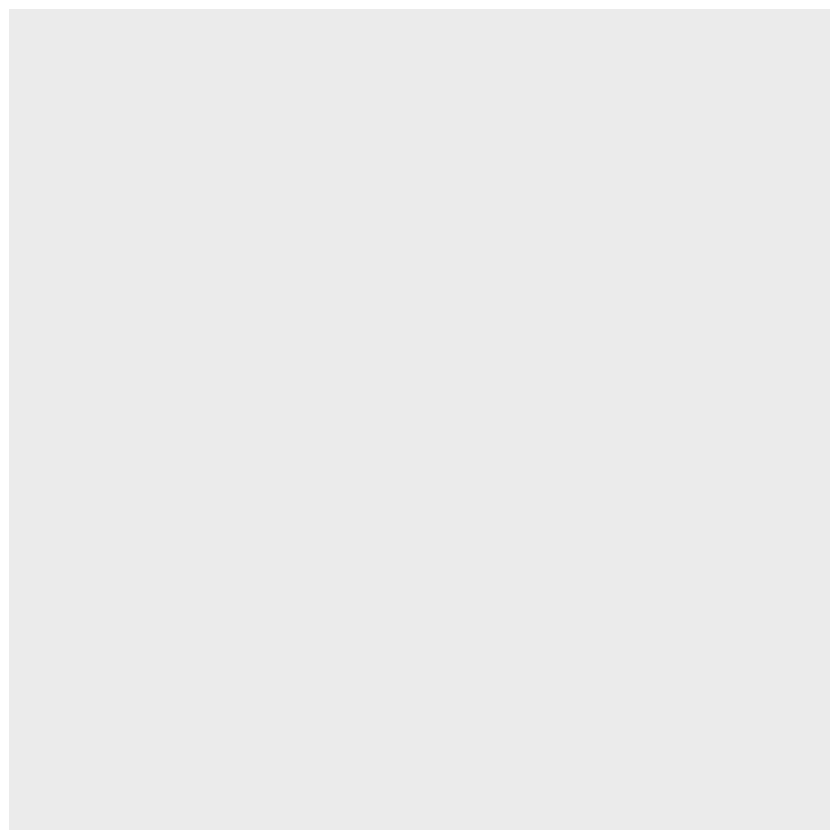

In [8]:
print(p)
p

## 7.3 Geometries

In `ggplot2` we create graphs by adding layers. Layers can define geometries, compute summary statistics, define what scales to use, or even change styles. To add layers, we use the symbol `+`. In general, a line of code will look like this:

    Data %>% `ggplot()` + LAYER 1 + LAYER 2 + $ddots$ + LAYER N

Usually, the first added layer defines the geometry. We want to make a scatterplot. What geometry do we use?

Taking a quick look at the cheat sheet, we see that the function used to create plots with this geometry is `geom_point`.

Geometry function names follow the pattern: `geom_X` where X is the name of the geometry. Some examples include `geom_point`, `geom_bar`, and `geom_histogram`.

For `geom_point` to run properly we need to provide data and a mapping. We have already connected the object `p` with the `murders` data table, and if we add the layer `geom_point` it defaults to using this data. To find out what mappings are expected, we read the __Aesthetics__ section of the help file `geom_point` help file:

  Aesthetics
  `geom_point()` understands the following aesthetics (required aesthetics are in bold):
  * __x__
  * __y__
  * alpha 
  * colour
  * fill
  * group
  * shape
  * size
  * stroke

and, as expected, we see that at least two arguments are required `x` and `y`.

## 7.4 Aesthetic mappings

__Aesthetic mappings__ describe how properties of the data connect with features of the graph, such as distance along an axis, size, or color. The `aes` function connects data with what we see on the graph by defining aesthetic mappings and will be one of the functions you use most often when plotting. The outcome of the `aes` function is often used as the argument of a geometry function. This example produces a scatterplot of total murders versus population in millions:

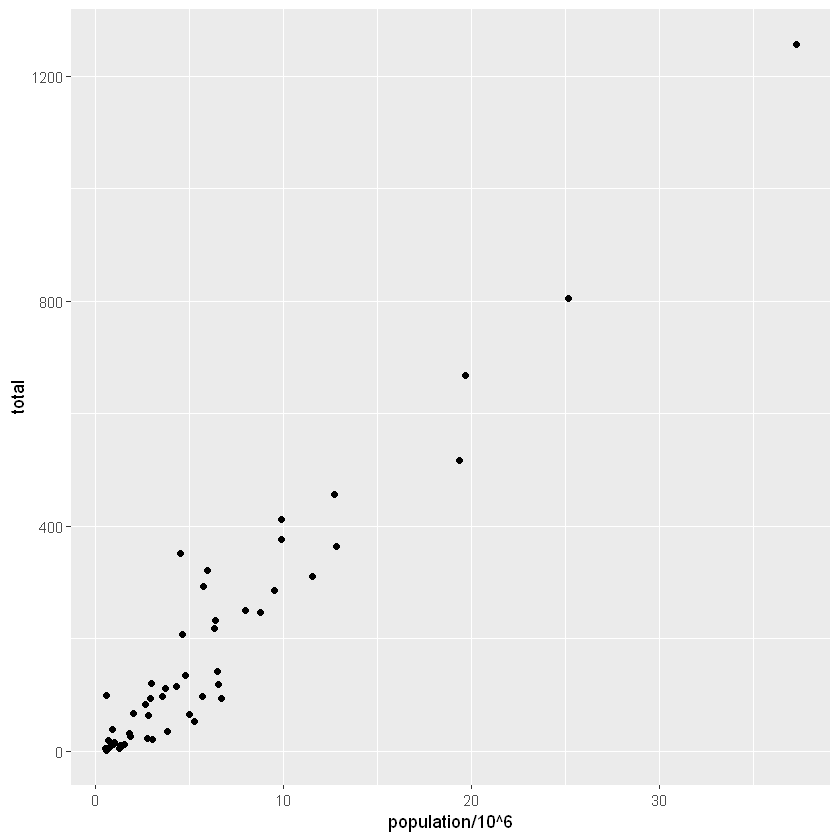

In [10]:
murders %>% ggplot() + 
    geom_point(aes(x = population/10^6, y = total))

We can drop the `x =` and `y =` if we wanted to since these are the first and second expected arguments, as seen in the help page.

Instead of defining our plot from scratch, we can also add a layer to the `p` object that was defined above as `p <- ggplot(data = murders)`:

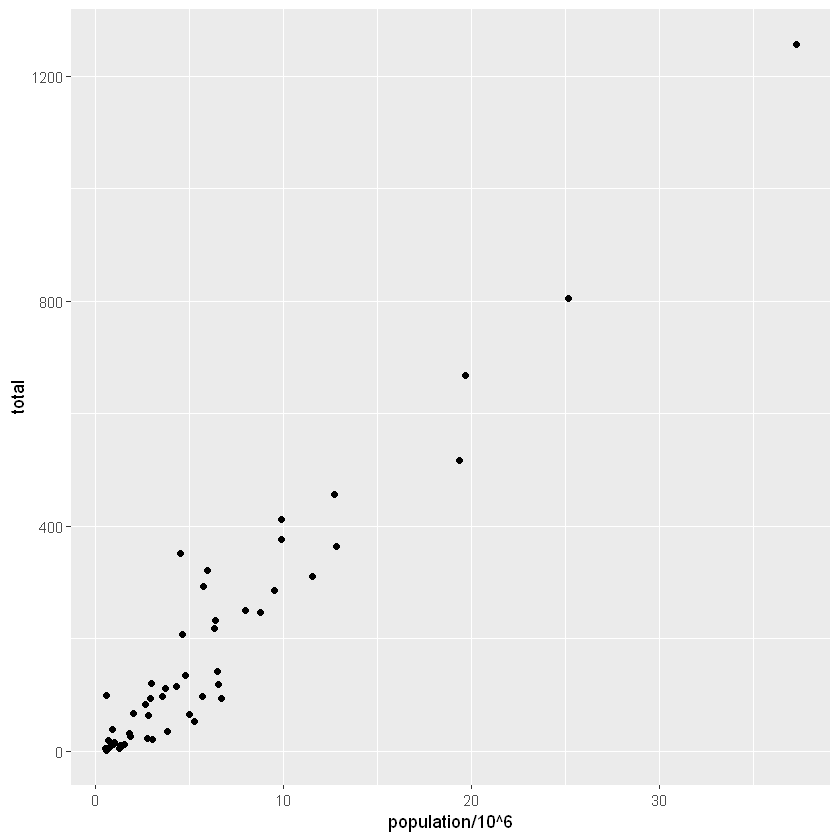

In [12]:
p + geom_point(aes(population/10^6, total))

The scale and labels are defined by default when adding this layer. Like __dplyr__ functions, `aes` also uses the variable names from the object component: we can use population and total without having to call them as `murders$population` and `murders$total`. The behavior of recognizing the variables from the data component is quite specific to `aes`. With most functions, if you try to access the values of `population` or `total` outside of `aes` you receive an error.

## 7.5 Layers

A second layer in the plot we wish to make involves adding a label to each point to identify the state. The `geom_label` and `geom_text` functions permit us to add text to the plot with and without a rectangle behind the text, respectively.

Because each point (each state in this case) has a label, we need an aesthetic mapping to make the connection between points and labels. By reading the help file, we learn that we supply the mapping between point and label through the `label` argument of `aes`. So the code looks like this:

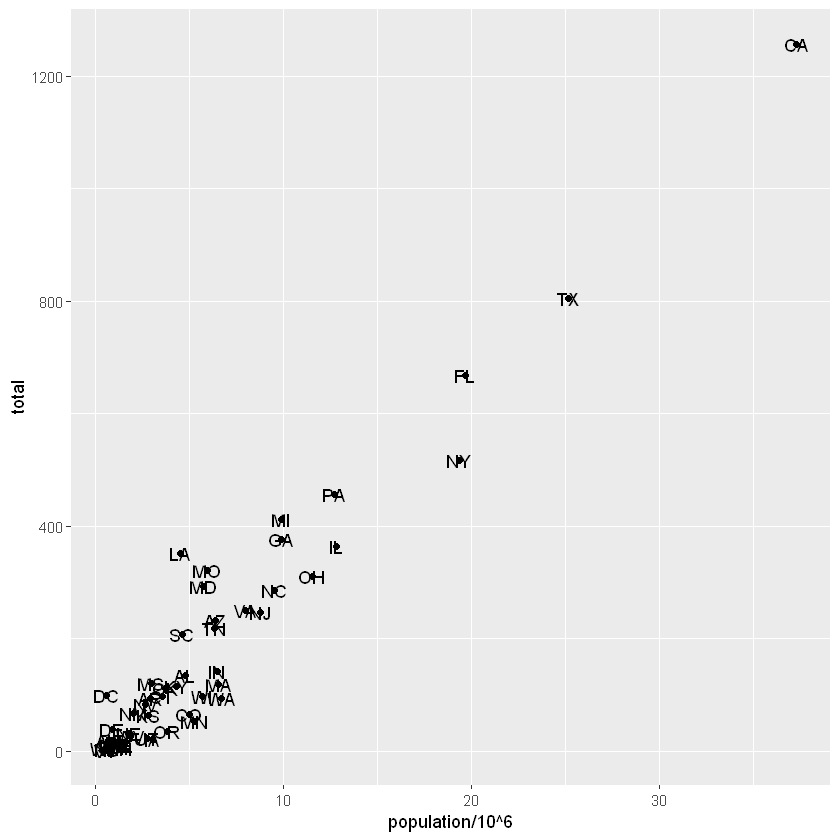

In [14]:
p + geom_point(aes(population/10^6, total)) +
    geom_text(aes(population/10^6, total, label = abb))

We have successfully added a second layer to the plot.

As an example of the unique behavior of `aes` mentioned above, note that this call:

In [ ]:
p_test <- p + geom_text(aes(population/10^6, total, label = abb))

is fine, whereas this call:

In [15]:
p_test <- p + geom_text(aes(population/10^6, total), label = abb) 

ERROR: Error in layer(data = data, mapping = mapping, stat = stat, geom = GeomText, : 객체 'abb'를 찾을 수 없습니다


will give you an error since `abb` is not found because it is outside of the `aes` function. The layer `geom_text` does not know where to find `abb` since it is a column name and not a global variable.

### 7.5.1 Tinkering with arguments

Each geometry function has many arguments other than `aes` and `data`. They tend to be specific to the function. For example, in the plot we wish to make, the points are larger than the default size. In the help file we see that `size` is an aesthetic and we can change it like this:

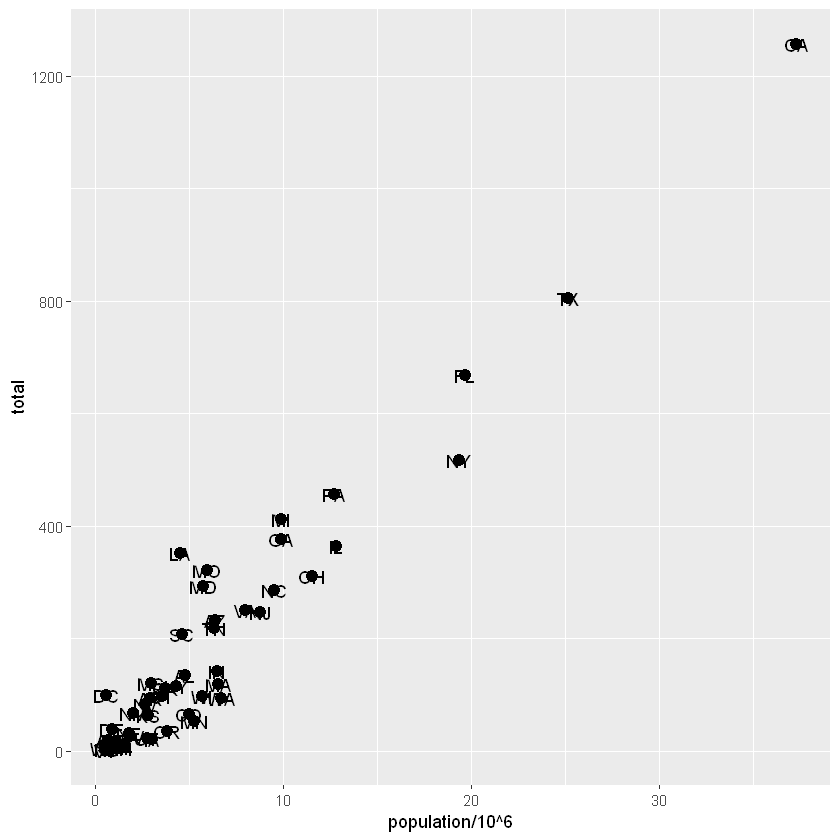

In [17]:
p + geom_point(aes(population/10^6, total), size = 3) +
    geom_text(aes(population/10^6, total, label = abb))

`size` is not a mapping: whereas mappings use data from specific observations and need to be inside `aes()`, operations we want to affect all the points the same way do not need to be included inside `aes`.

Now because the points are larger it is hard to see the labels. If we read the help file for `geom_text`, we see the `nudge_x` argument, which moves the text slightly to the right or to the left:

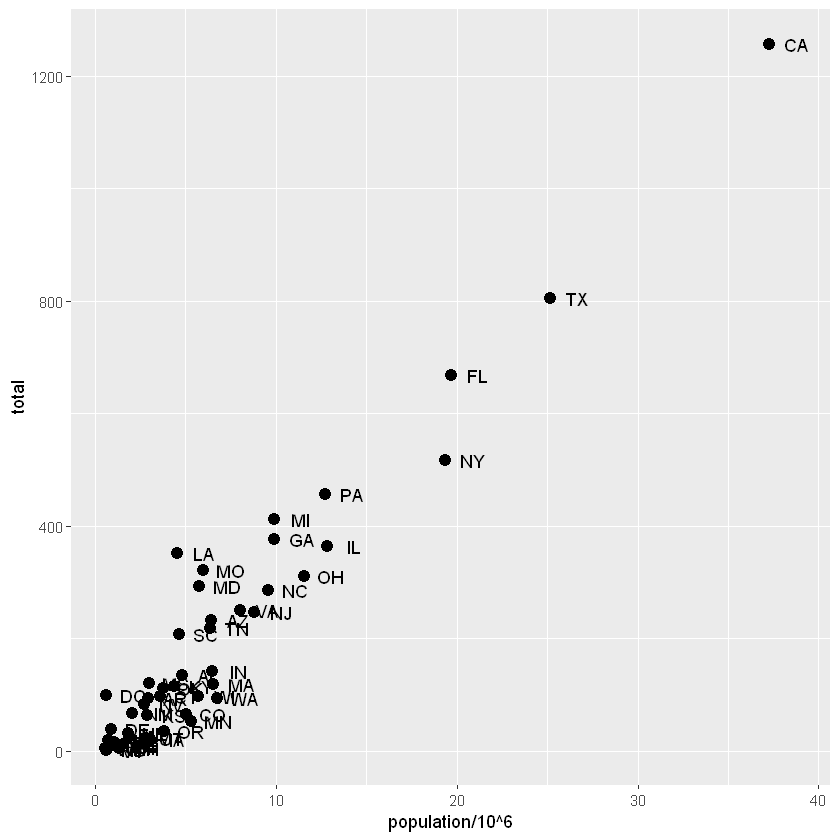

In [19]:
p + geom_point(aes(population/10^6, total), size = 3) +
    geom_text(aes(population/10^6, total, label = abb), nudge_x = 1.5)

This is preferred as it makes it easier to read the text. In Section 7.11 we learn a better way of assuring we can see the points and the labels.



## Global versus local aesthetic mappings

In the previous line of code, we define the mapping `aes(population/10^6, total)` twice, once in each geometry. We can avoid this by using a _global_ aesthetic mapping. We can do this when we define the blank slate `ggplot` object. Remember that the function `ggplot` contains an argument that permits us to define aesthetic mappings:

In [20]:
args(ggplot)

function (data = NULL, mapping = aes(), ..., environment = parent.frame()) 
NULL

If we define a mapping in `ggplot`, all the geometries that are added as layers will default to this mapping. We redefine `p`:

In [22]:
p <- murders %>% ggplot(aes(population/10^6, total, label = abb))

and then we can simply write the following code to produce the previous plot:

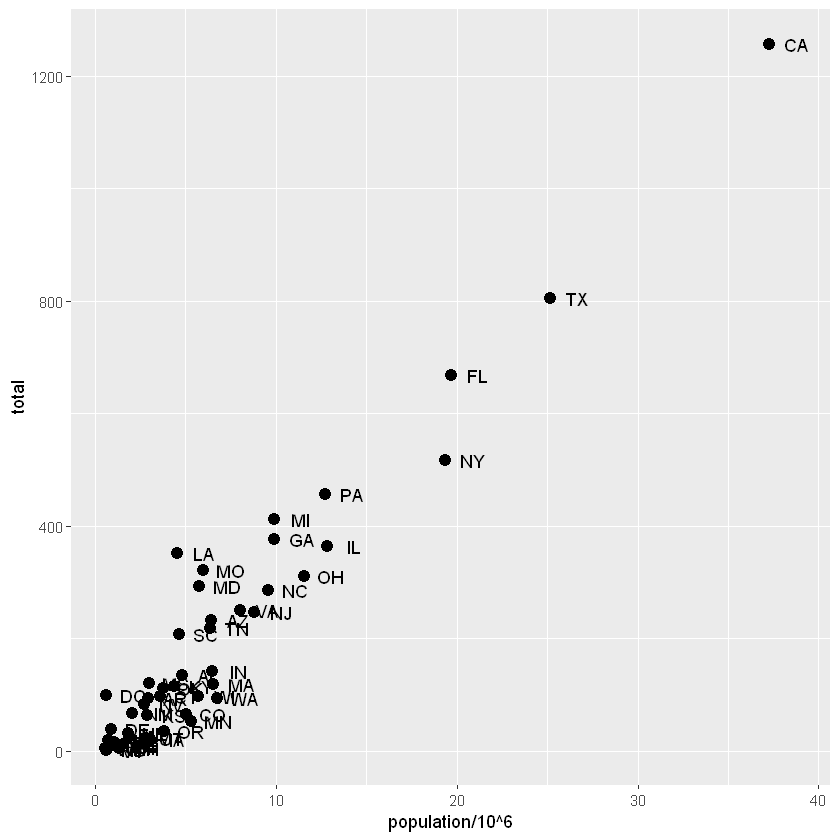

In [23]:
p + geom_point(size = 3) +
    geom_text(nudge_x = 1.5)

We keep the `size` and `nudge_x` arguments in `geom_point` and `geom_text`, respectively, because we want to only increase the size of points and only nudge the labels. If we put those arguments in `aes` then they would apply to both plots. Also note that the `geom_point` function does not need a `label` argument and therefore ignores that aesthetic.

If necessary, we can override the global mapping by defining a new mapping within each layer. These _local_ definitions override the global. Here is an example:

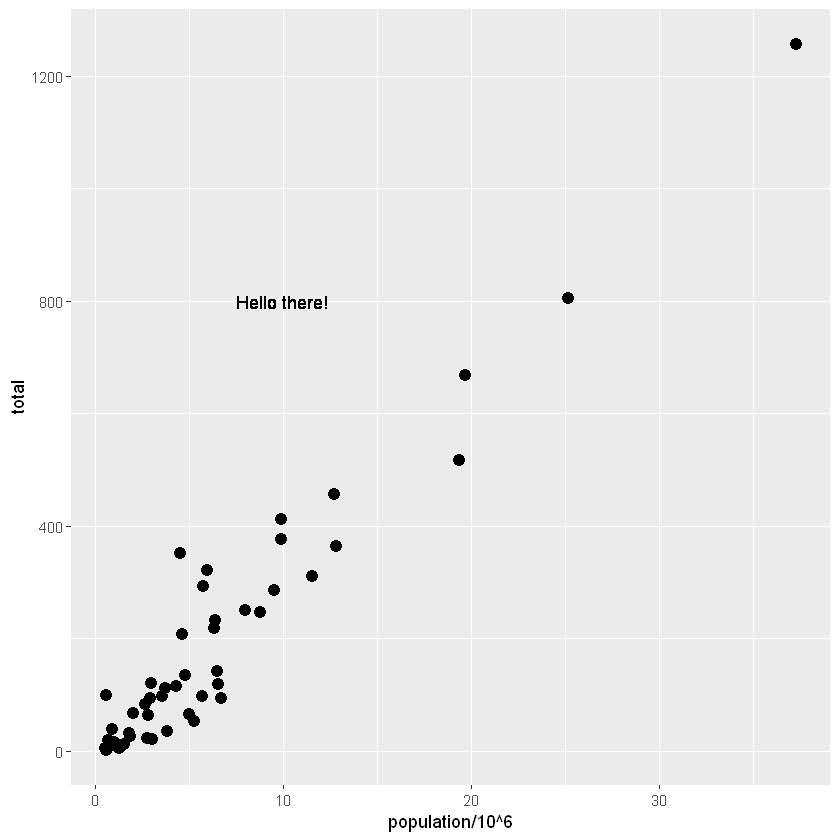

In [26]:
p + geom_point(size = 3) +
    geom_text(aes(x = 10, y = 800, label = "Hello there!"))

Clearly, the second call to `geom_text` does not use `population` and `total`.

## 7.7 Scales

First, our desired scales are in log-scale. This is not the default, so this change needs to be added through a _scales_ layer. A quick look at the cheat sheet reveals the `scale_x_continuous` function lets us control the behavior of scales. We use them like this:

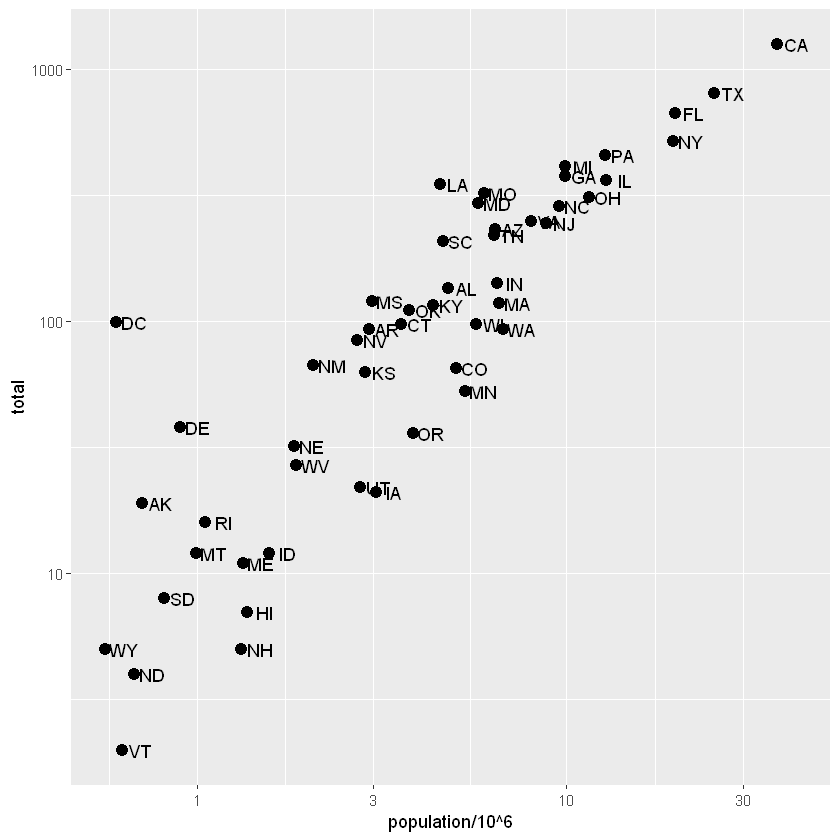

In [28]:
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.05) +
    scale_x_continuous(trans= "log10") +
    scale_y_continuous(trans="log10")

Because we are in the log-scale now, the _nudge_ must be made smaller.

This particular transformation is so common that __ggplot2__ provides the specialized functions `scale_x_log10` and `scale_y_log10`, which we can use to rewrite the code like this:

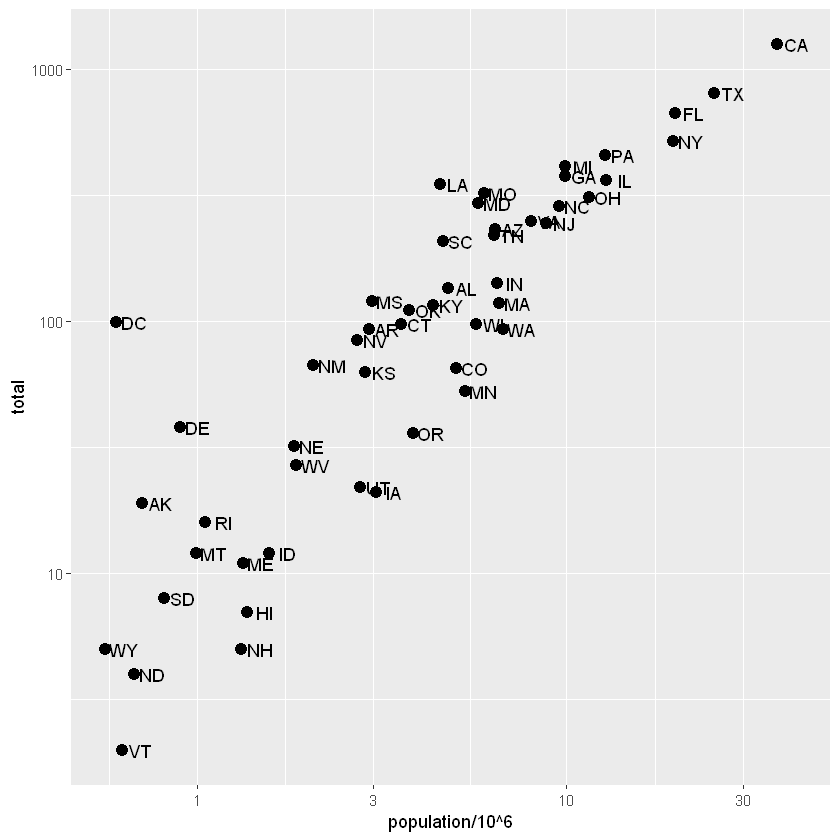

In [30]:
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.05) +
    scale_x_log10() +
    scale_y_log10()

## 7.8 Labels and titles

Similarly, the cheat sheet quickly reveals that to change labels and add a title, we use the following functions:

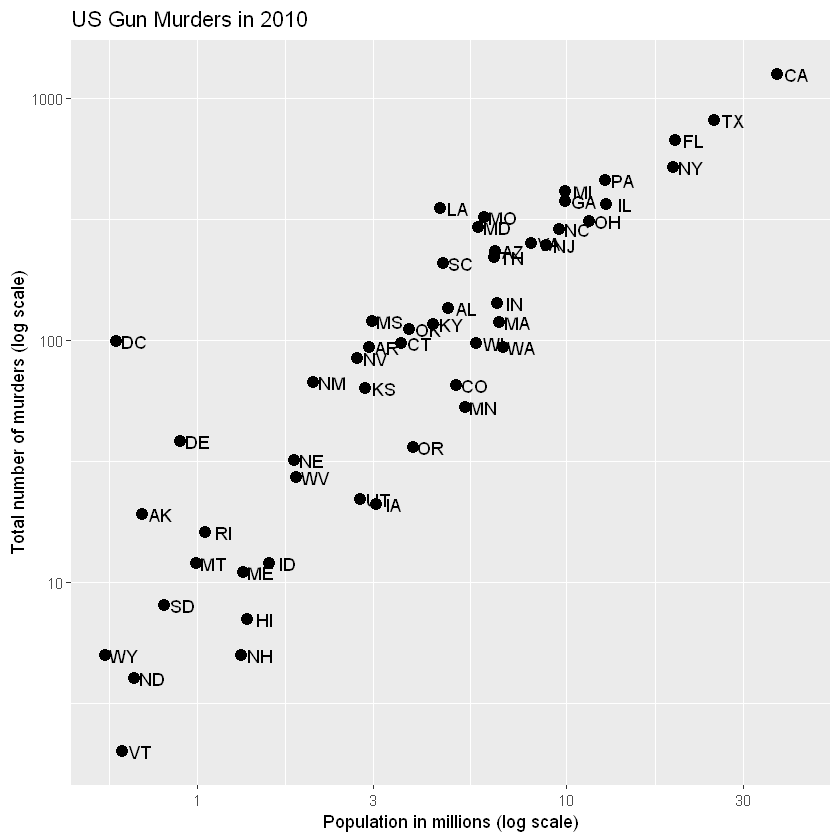

In [32]:
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.05) +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Population in millions (log scale)") +
    ylab("Total number of murders (log scale)") +
    ggtitle("US Gun Murders in 2010")

We are almost there! All we have left to do is add color, a legend, and optional changes to the style.

## 7.9 Categories as colors

We can change the color of the points using the col argument in the geom_point function. To facilitate demonstration of new features, we will redefine p to be everything except the points layer:

In [3]:
p <- murders %>% ggplot(aes(population/10^6, total, label = abb)) +
    geom_text(nudge_x = 0.05) +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Populatons in millions (log scale)") + 
    ylab("Total number of murders (log scale)") +
    ggtitle("US Gun Murders in 2010")

and then test out what happens by adding different calls to `geom_point`. We can make all the points blue by adding the `color` argument: 

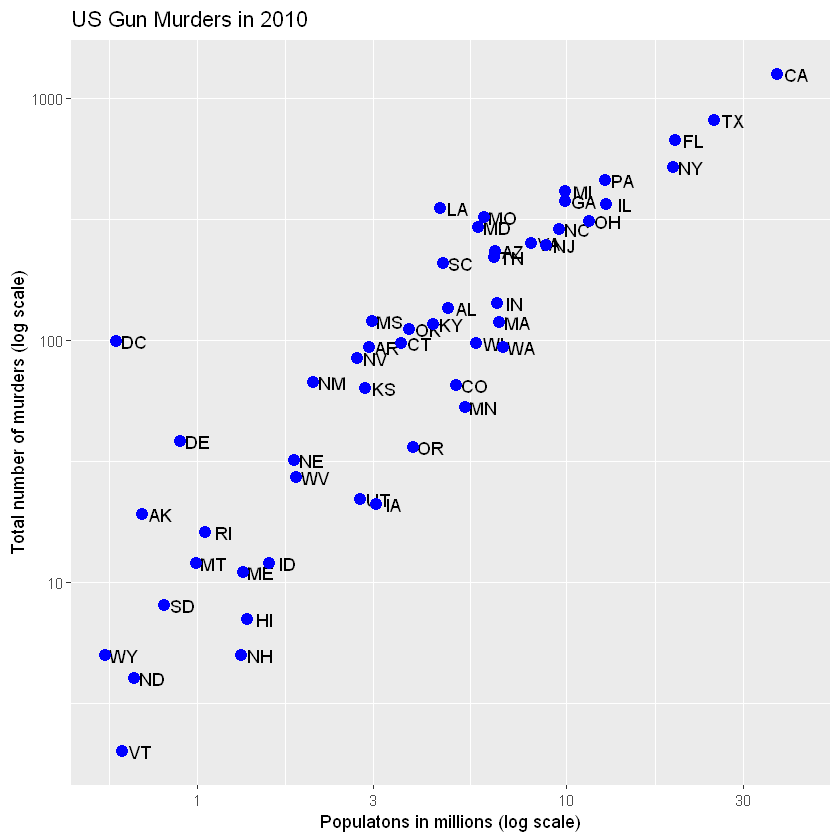

In [4]:
p + geom_point(size = 3, color = "blue")

This, of course, is not what we want. We want to assign color depending on the geographical region. A nice default behavior of __ggplot2__ is that if we assign a categorical variable to color, it automatically assigns a different color to each category and also adds a legend.

Since the choice of color is determined by a feature of each observation, this is an aesthetic mapping. To map each point to a color, we need to use `aes`. We use the following code:

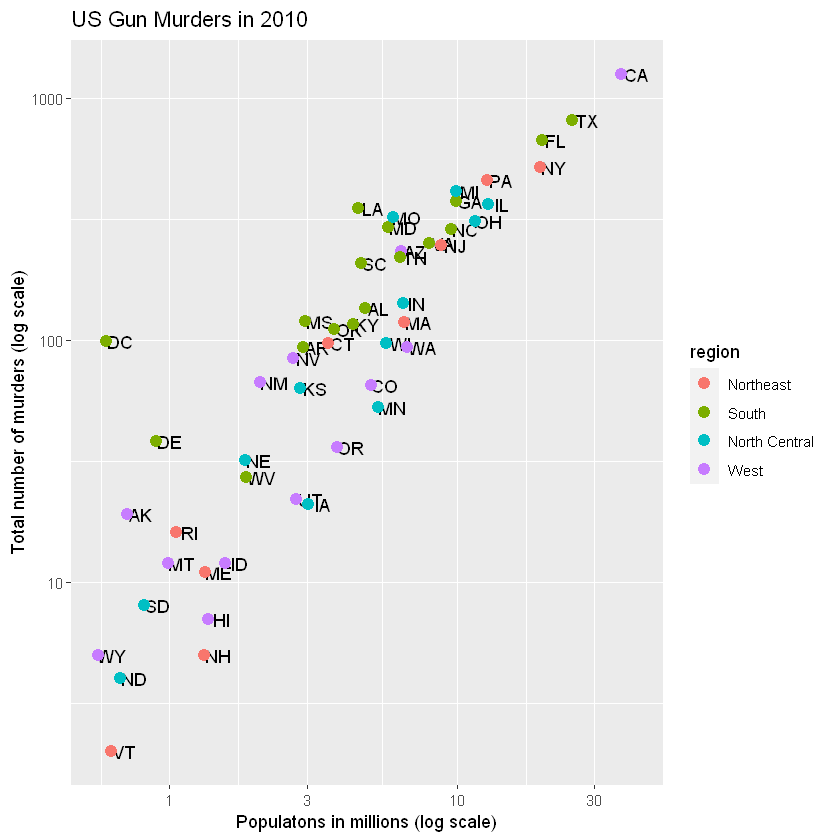

In [5]:
p + geom_point(aes(col=region), size = 3)

The `x` and `y` mappings are inherited from those already defined in `p`, so we do not redefine them. We also move `aes` to the first argument since that is where mappings are expected in this function call.

Here we see yet another useful default behavior: __ggplot2__ automatically adds a legend that maps color to region. To avoid adding this legend we set the `geom_point` argument `show.legend = FALSE`.

## 7.10 Annotation, shapes, and adjustments

We often want to add shapes or annotation to figures that are not derived directly from the aesthetic mapping; examples include labels, boxes, shaded areas, and lines.

Here we want to add a line that represents the average murder rate for the entire country. Once we determine the per million rate to be $r$, this line is defined by the fumula: $y = rx$, with $y$ and $x$ our axes: total murders and population in millions, respectively. In the log-scale this line turns into: $log(y) = log(r)+log(x)$. So in our plot it's a line with slop 1 and intercept $log(r)$. To compute this value, we use our __dplyr__ skills: 


In [6]:
r <- murders %>%
    summarize(rate = sum(total) / sum(population) * 10^6) %>%
    pull(rate)

To add a line we use the `geom_abline` function. __ggplot2__ uses `ab` in the name to remind us we are supplying the intercept (`a`) and slope (`b`). The default line has slope 1 and intercept 0 so we only have to define the intercept:

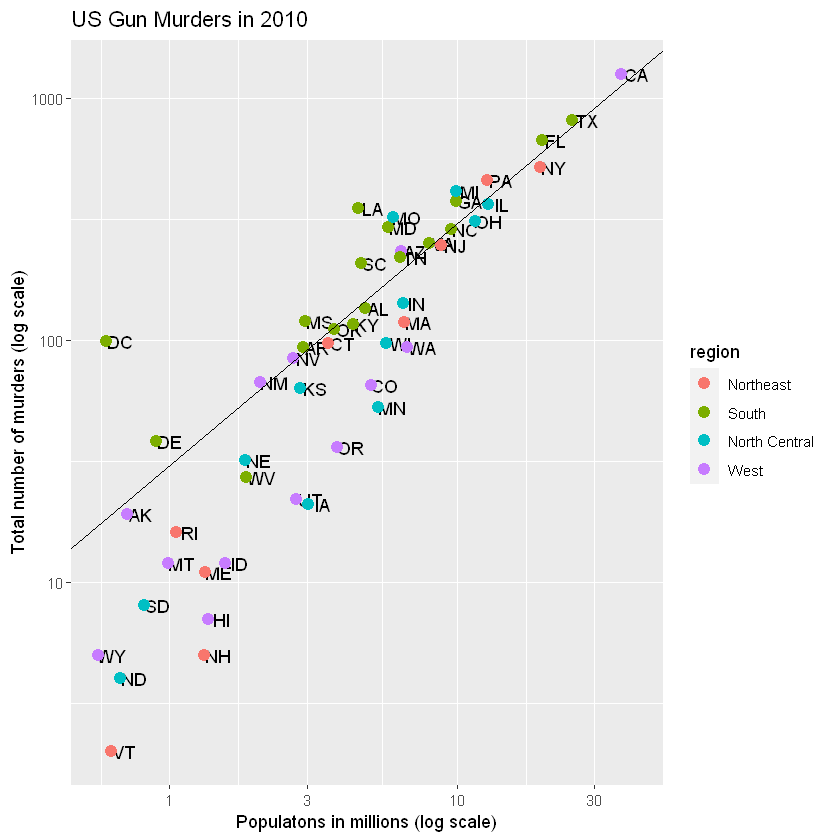

In [8]:
p + geom_point(aes(col=region), size = 3) +
    geom_abline(intercept = log10(r))

Here `geom_abline` does not use any information from the data object.

We can change the line type and color of the lines using arguments. Also, we draw it first so it doesn’t go over our points.

In [9]:
p <- p + geom_abline(intercept = log10(r), lty = 1, color = "darkgrey") +
    geom_point(aes(col=region), size = 3)

Note that we have redefined `p` and used this new `p` below and in the next section.

The default plots created by __ggplot2__ are already very useful. However, we frequently need to make minor tweaks to the default behavior. Although it is not always obvious how to make these even with the cheat sheet, __ggplot2__ is very flexible.

For example, we can make changes to the legend via the `scale_color_discrete` function. In our plot the word region is capitalized and we can change it like this:

In [10]:
p <- p + scale_color_discrete(name = "Region")

## 7.11 Add-on packages

The power of __ggplot2__ is augmented further due to the availability of add-on packages. The remaining changes needed to put the finishing touches on our plot require the __ggthemes__ and __ggrepel__ packages.

The style of a __ggplot2__ graph can be changed using the `theme` functions. Several themes are included as part of the __ggplot2__ package. In fact, for most of the plots in this book, we use a function in the __dslabs__ package that automatically sets a default theme:

In [11]:
ds_theme_set()

Many other themes are added by the package `ggthemes`. Among those are the `theme_economist` theme that we used. After installing the package, you can change the style by adding a layer like this:




package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\withj\AppData\Local\Temp\RtmpeyzUcD\downloaded_packages


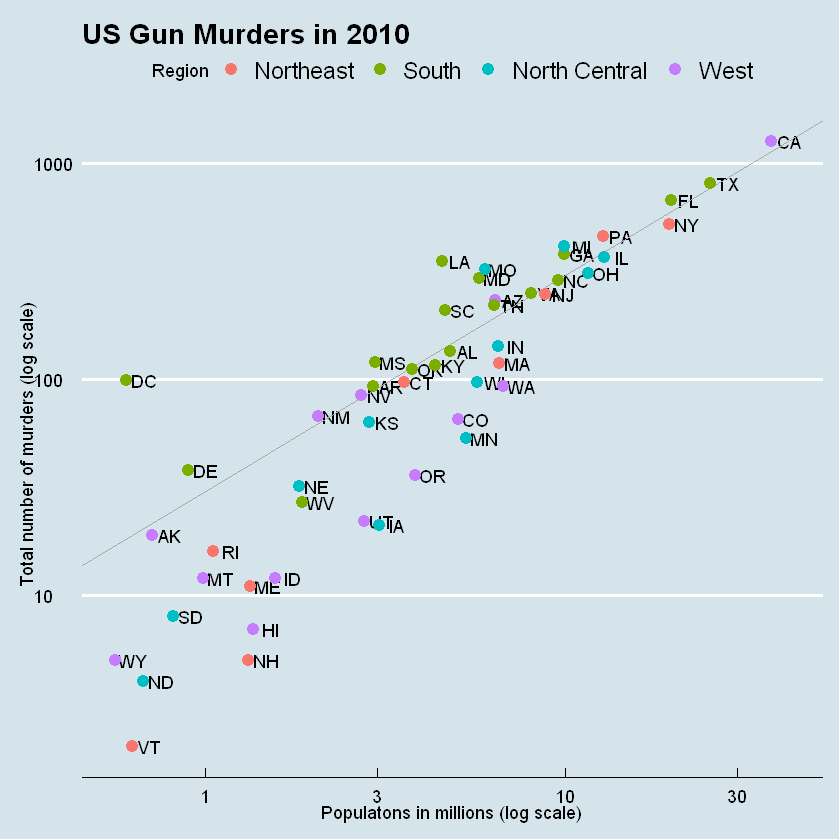

In [14]:
install.packages("ggthemes")
library(ggthemes)
p + theme_economist()

You can see how some of the other themes look by simply changing the function. For instance, you might try the `theme_fivethirtyeight()` theme instead.

The final difference has to do with the position of the labels. In our plot, some of the labels fall on top of each other. The add-on package __ggrepel__ includes a geometry that adds labels while ensuring that they don’t fall on top of each other. We simply change `geom_text` with `geom_text_repel`.

## 7.12 Putting it all together

Now that we are done testing, we can write one piece of code that produces our desired plot from scratch.

Warning message:
"package 'ggrepel' is in use and will not be installed"


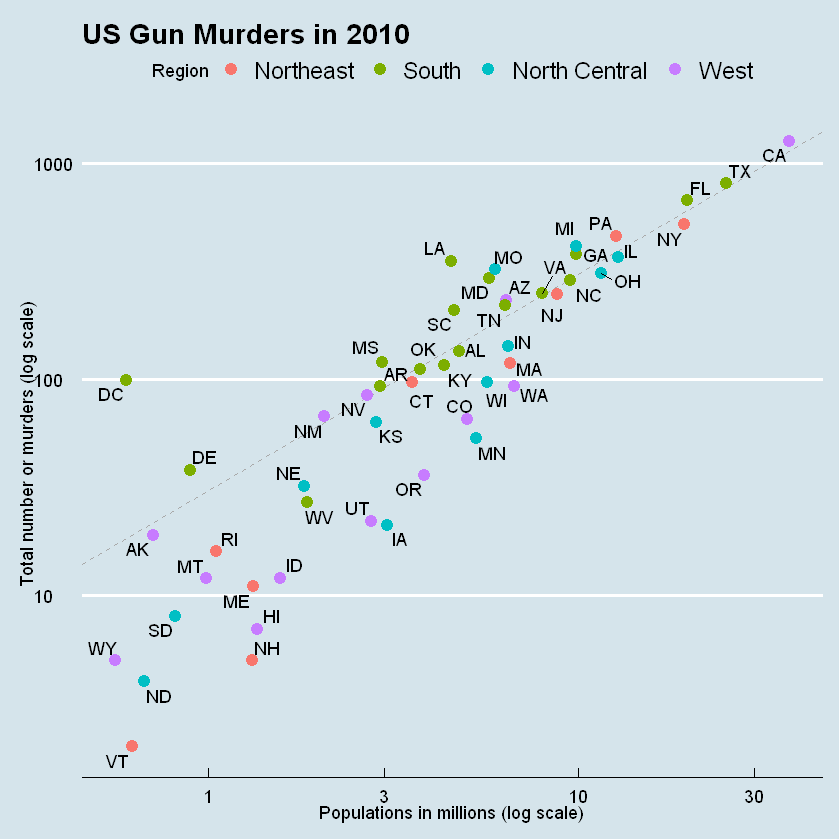

In [18]:
install.packages("ggrepel")
library(ggthemes)
library(ggrepel)

r <- murders %>%
    summarize(rate = sum(total)/sum(population)*10^6) %>%
    pull(rate)

murders %>% ggplot(aes(population/10^6, total, label = abb)) +
    geom_abline(intercept = log10(r), lty=2, color="darkgrey") +
    geom_point(aes(col=region), size = 3) +
    geom_text_repel() +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Populations in millions (log scale)") +
    ylab("Total number or murders (log scale)") +
    ggtitle("US Gun Murders in 2010") +
    scale_color_discrete(name = "Region") +
    theme_economist()

## Quick plots with 'qplot'

We have learned the powerful approach to generating visualization with ggplot. However, there are instances in which all we want is to make a quick plot of, for example, a histogram of the values in a vector, a scatterplot of the values in two vectors, or a boxplot using categorical and numeric vectors. We demonstrated how to generate these plots with `hist`, `plot`, and `boxplot`. However, if we want to keep consistent with the ggplot style, we can use the function `qplot`.

If we have values in two vectors, say:

In [19]:
data(murders)
x <- log10(murders$population)
y <- murders$total

and we want to make a scatterplot with ggplot, we would have to type something like:

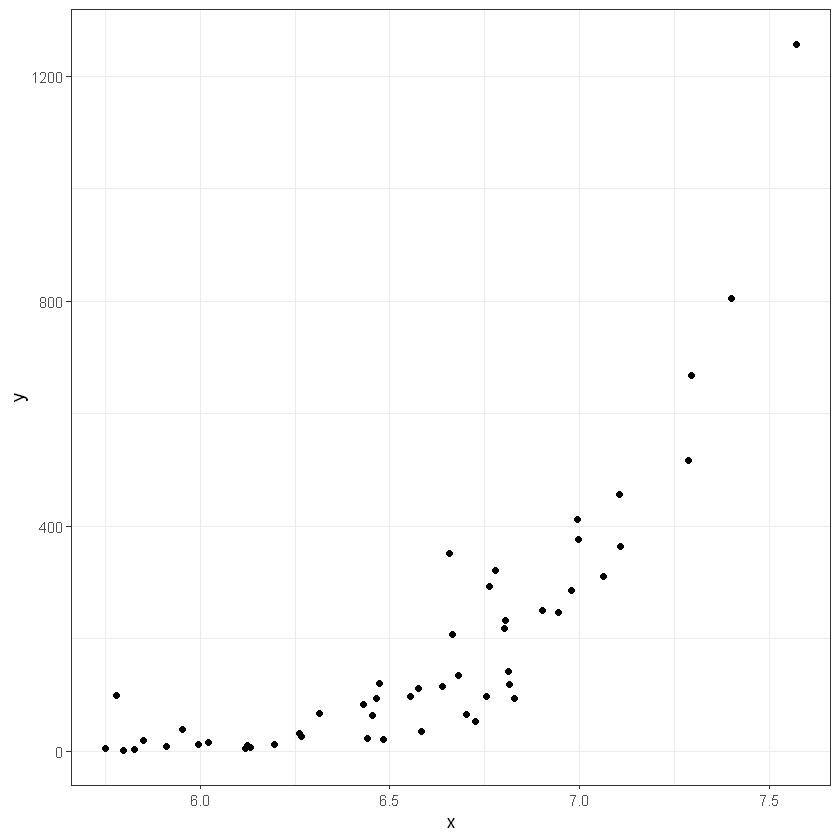

In [20]:
data.frame(x = x, y = y) %>%
    ggplot(aes(x, y)) +
    geom_point()

This seems like too much code for such a simple plot. The `qplot` function sacrifices the flexibility provided by the `ggplot` approach, but allows us to generate a plot quickly.

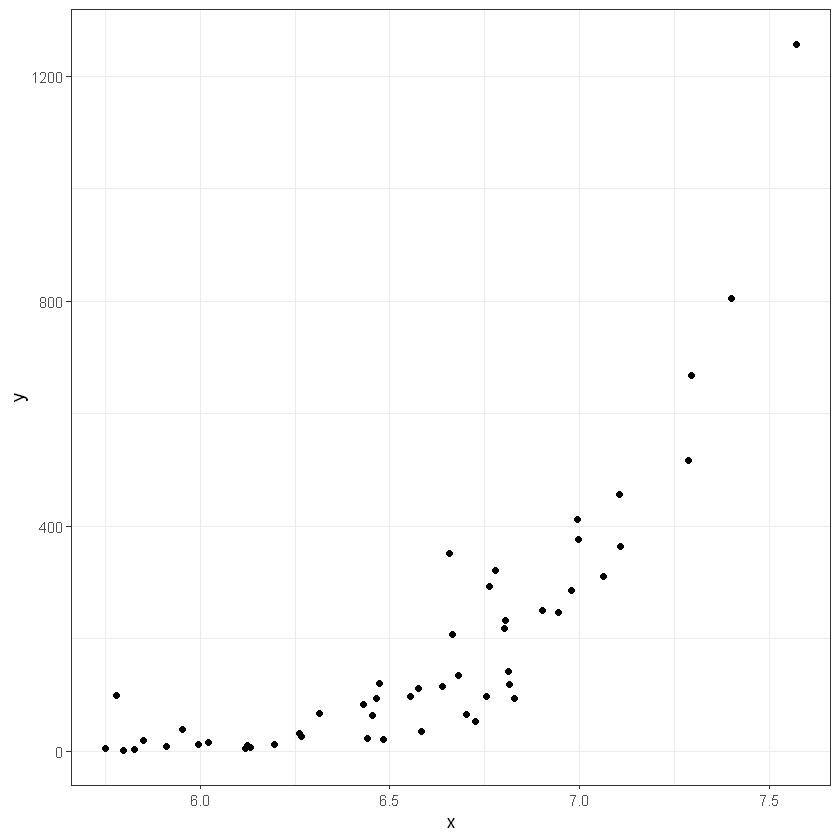

In [21]:
qplot(x,y)

We will learn more about `qplot` in Section 8.16

## 7.14 Grides of plots

There are often reasons to graph plots next to each other. The __gridExtra__ package permits us to do that:

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\withj\AppData\Local\Temp\RtmpeyzUcD\downloaded_packages



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



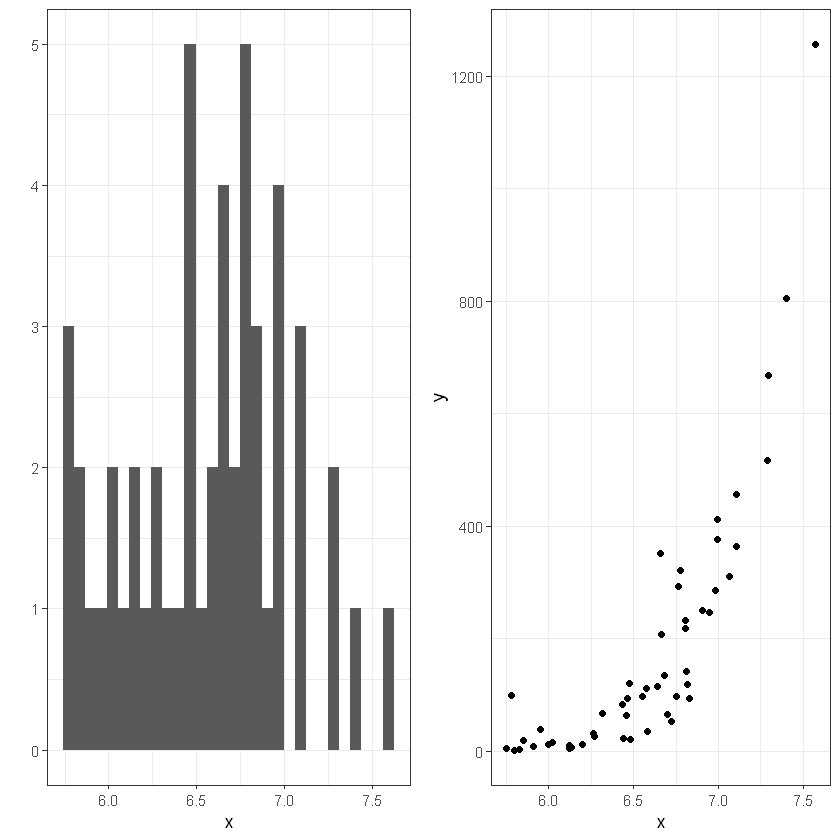

In [24]:
install.packages("gridExtra")
library(gridExtra)
p1 <- qplot(x)
p2 <- qplot(x,y)
grid.arrange(p1, p2, ncol = 2)

## 7.15 Exercises

Start by loading the __dplyr__ and __ggplot2__ library as well as the `murders` and `heights` data.

In [25]:
library(dplyr)
library(ggplot2)
library(dslabs)
data(heights)
data(murders)

1. With __ggplot2__ plots can be saved as objects. For example we can associate a dataset with a plot object like this

In [27]:
p <- ggplot(data = murders)

Because `data` is the first argument we don’t need to spell it out

In [28]:
p <- ggplot(murders)

and we can also use the pipe:

In [29]:
p <- murders %>% ggplot()

What is class of the object `p`?



In [30]:
class(p)

[1] "gg"     "ggplot"

2. Remember that to print an object you can use the command `print` or simply type the object. Print the object `p` defined in exercise one and describe what you see.

 a. Nothing happens.

 b. A blank slate plot.

 c. A scatterplot.

 d. A histogram.

Answer: b

3. Using the pipe `%>%`, create an object `p` but this time associated with the `heights` dataset instead of the `murders` dataset.

In [31]:
p <- heights %>% ggplot()

4. What is the class of the object `p` you have just created?

In [32]:
class(p)

[1] "gg"     "ggplot"

5. Now we are going to add a layer and the corresponding aesthetic mappings. For the murders data we plotted total murders versus population sizes. Explore the `murders` data frame to remind yourself what are the names for these two variables and select the correct answer. __Hint__: Look at `?murders`.

 a. `state` and `abb`.
 
 b. `total_murders` and `population_size`.
 
 c. `total` and `population`.
 
 d. `murders` and `size`.

Answer : c

6. To create the scatterplot we add a layer with `geom_point`. The aesthetic mappings require us to define the x-axis and y-axis variables, respectively. So the code looks like this:

In [ ]:
murders %>% ggplot(aes(x= , y = )) +
    geom_point()

except we have to define the two variables `x` and `y`. Fill this out with the correct variable names.

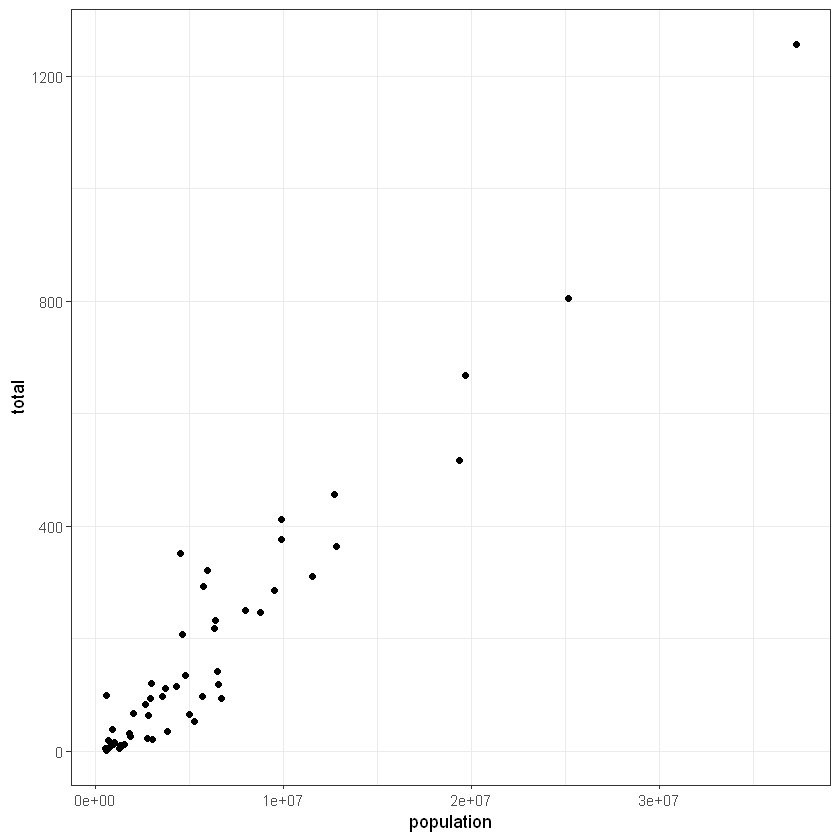

In [33]:
murders %>% ggplot(aes(x= population, y = total )) +
    geom_point()

7. Note that if we don’t use argument names, we can obtain the same plot by making sure we enter the variable names in the right order like this:

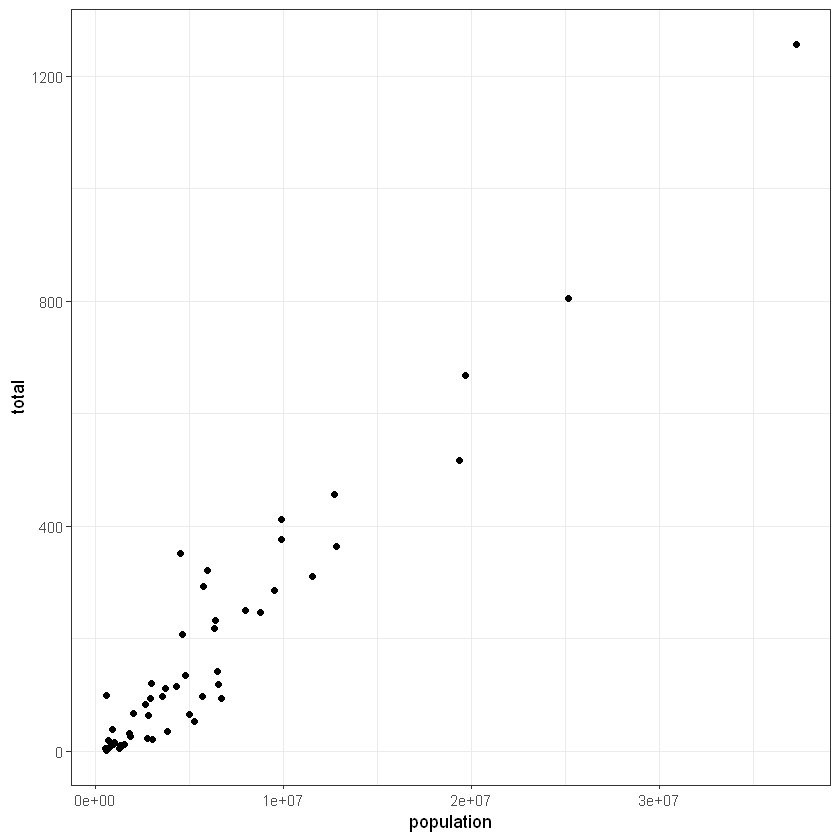

In [34]:
murders %>% ggplot(aes(population, total)) +
    geom_point()

Remake the plot but now with total in the x-axis and population in the y-axis.

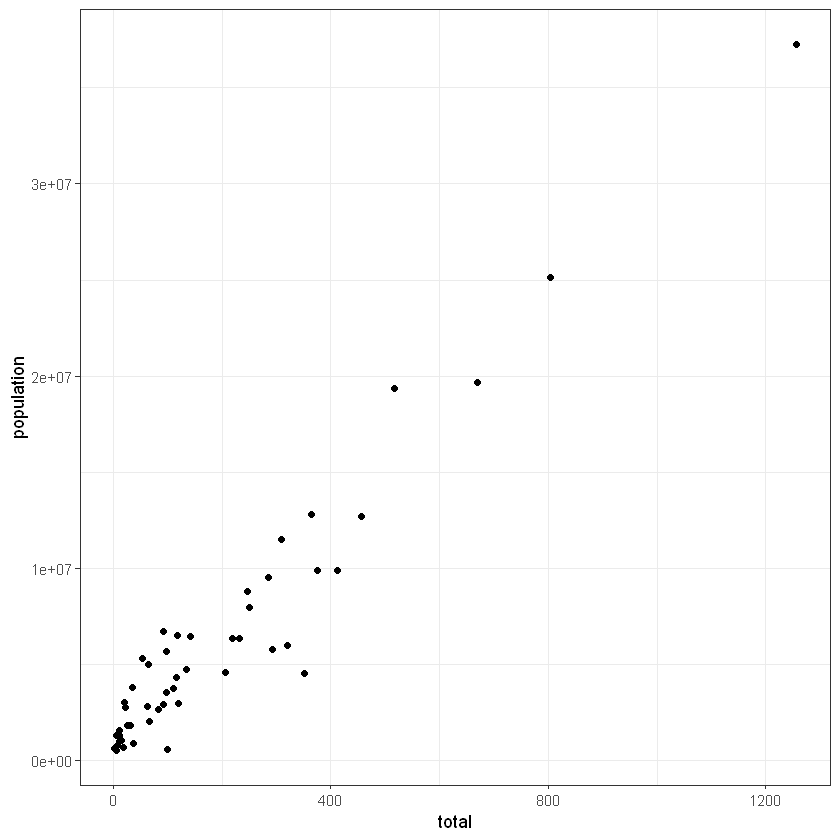

In [35]:
murders %>% ggplot(aes(total, population)) +
    geom_point()

8. If instead of points we want to add text, we can use the geom_text() or geom_label() geometries. The following code

In [ ]:
murders %>% ggplot(aes(population, total)) + geom_label()

will give us the error message: `Error: geom_label requires the following missing aesthetics: label`

Why is this?

 a. We need to map a character to each point through the label argument in aes.
 
 b. We need to let `geom_label` know what character to use in the plot.

 c. The `geom_label` geometry does not require x-axis and y-axis values.
 
 d. `geom_label` is not a ggplot2 command.
 
 Answer: a

9. Rewrite the code above to use abbreviation as the label through `aes`

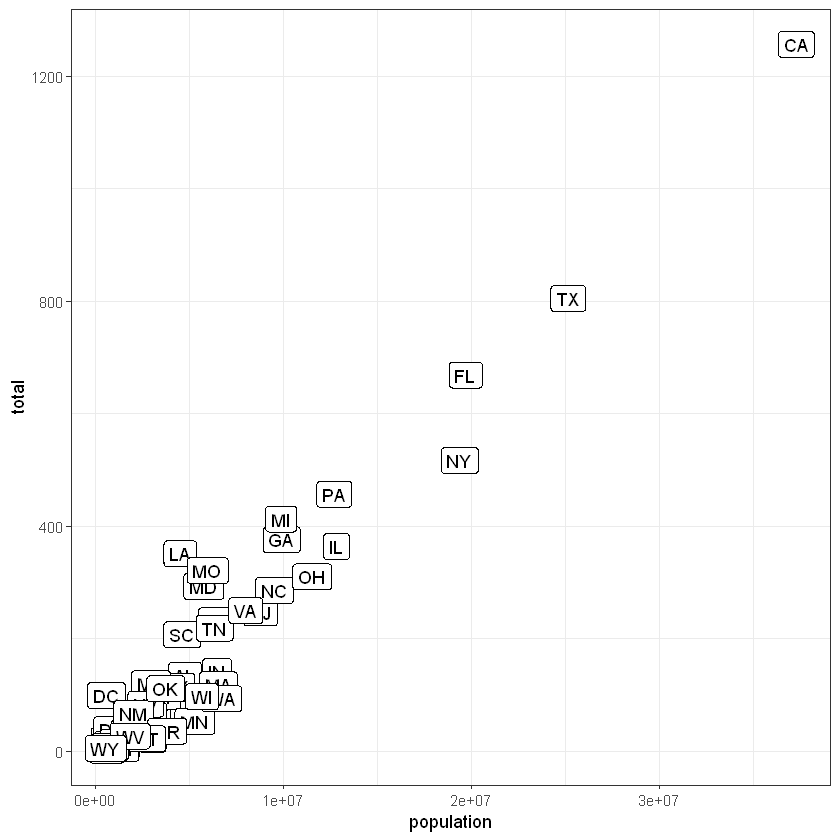

In [36]:
murders %>% ggplot(aes(population, total, label = abb)) + geom_label()

10. Change the color of the labels to blue. How will we do this?

 a. Adding a column called `blue` to `murders`.

 b. Because each label needs a different color we map the colors through `aes`.
 
 c. Use the `color` argument in ggplot.
 
 d. Because we want all colors to be blue, we do not need to map colors, just use the color argument in `geom_label`.

Answer: d

11. Rewrite the code above to make the labels blue.

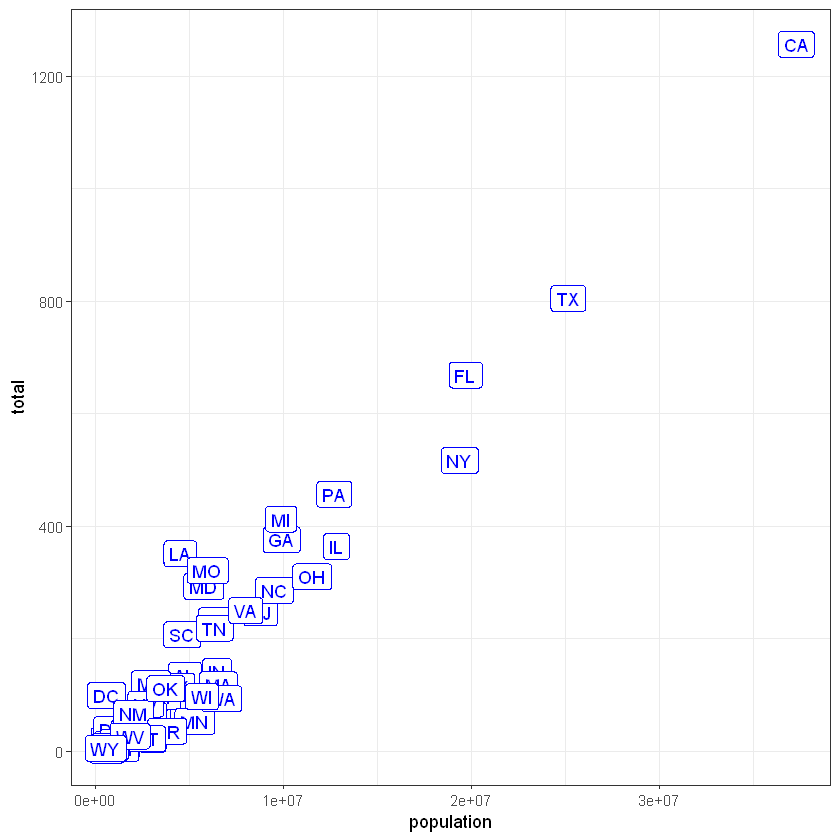

In [37]:
murders %>% ggplot(aes(population, total, label = abb)) + geom_label(color = "blue")

12. Now suppose we want to use color to represent the different regions. In this case which of the following is most appropriate:

 a. Adding a column called `color` to `murders` with the color we want to use.
 
 b. Because each label needs a different color we map the colors through the color argument of` aes` .
 
 c. Use the `color` argument in ggplot.
 
 d. Because we want all colors to be blue, we do not need to map colors, just use the color argument in `geom_label`.

Answer: b

13. Rewrite the code above to make the labels’ color be determined by the state’s region.

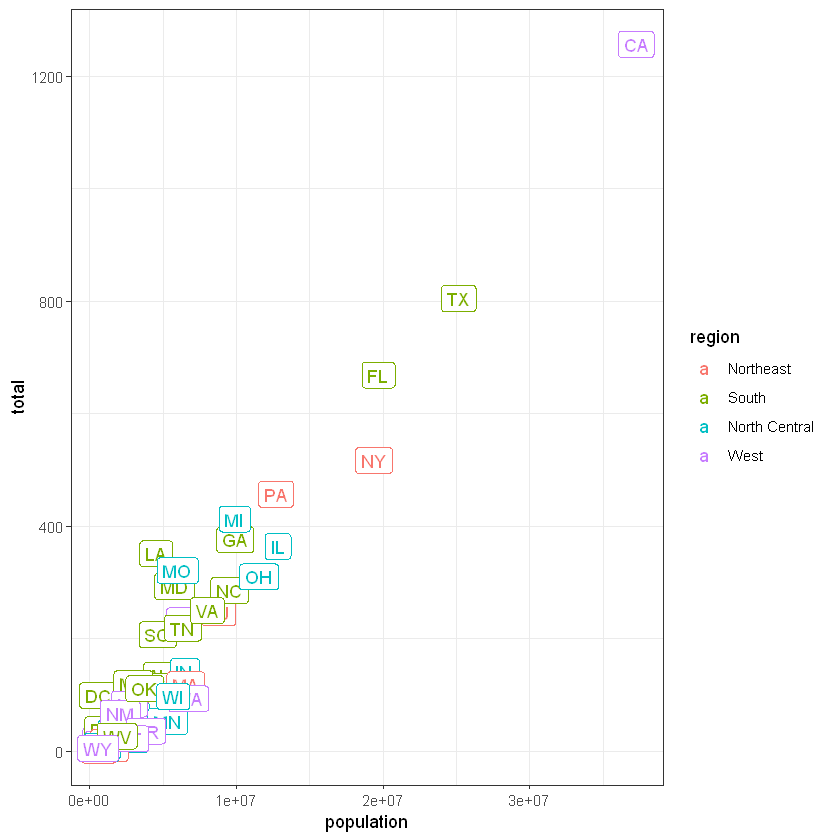

In [38]:
murders %>% ggplot(aes(population, total, label = abb)) + geom_label(aes(col = region))

14. Now we are going to change the x-axis to a log scale to account for the fact the distribution of population is skewed. Let’s start by defining an object `p` holding the plot we have made up to now

In [39]:
p <- murders %>% 
    ggplot(aes(population, total, label = abb, color = region)) +
    geom_label()

To change the y-axis to a log scale we learned about the `scale_x_log10()` function. Add this layer to the object `p` to change the scale and render the plot.

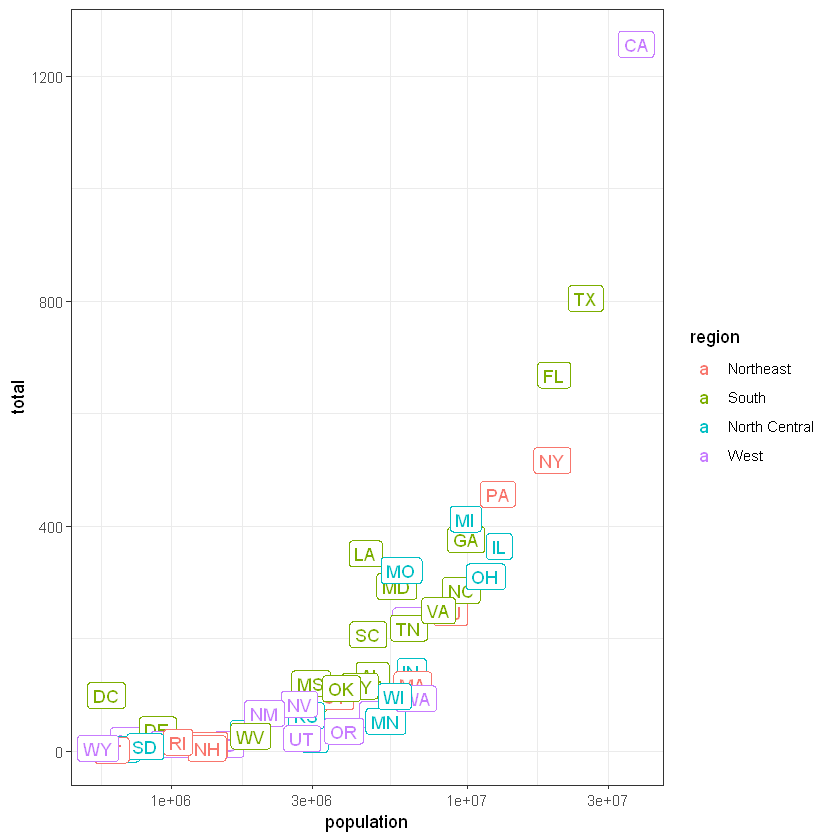

In [40]:
p + scale_x_log10()

15. Repeat the previous exercise but now change both axes to be in the log scale.

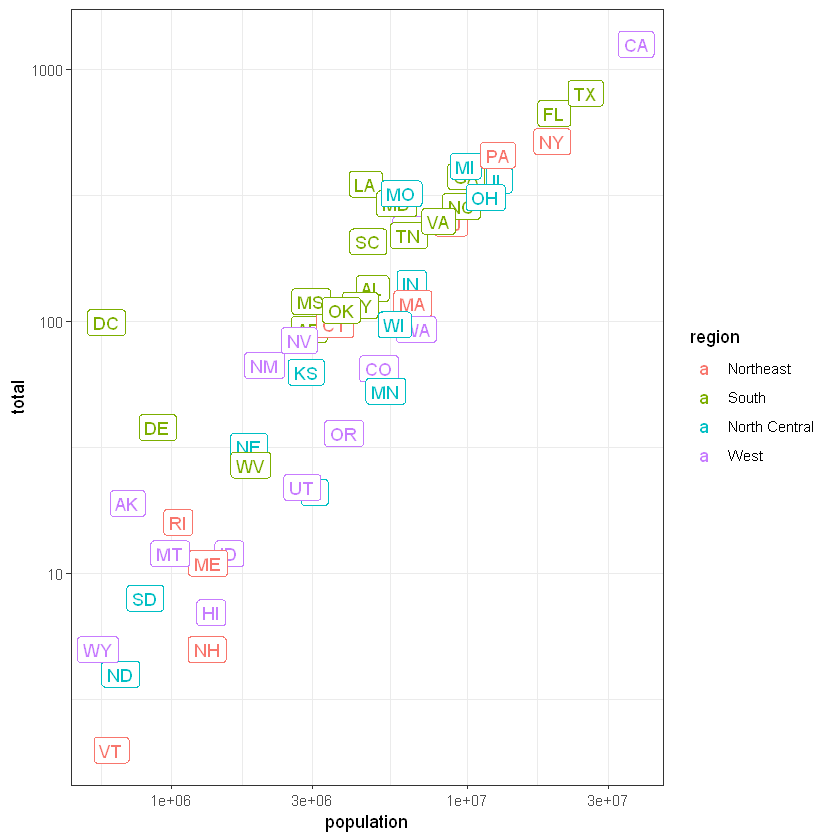

In [41]:
p + scale_x_log10() + scale_y_log10()

16. Now edit the code above to add the title “Gun murder data” to the plot. Hint: use the `ggtitle` function.

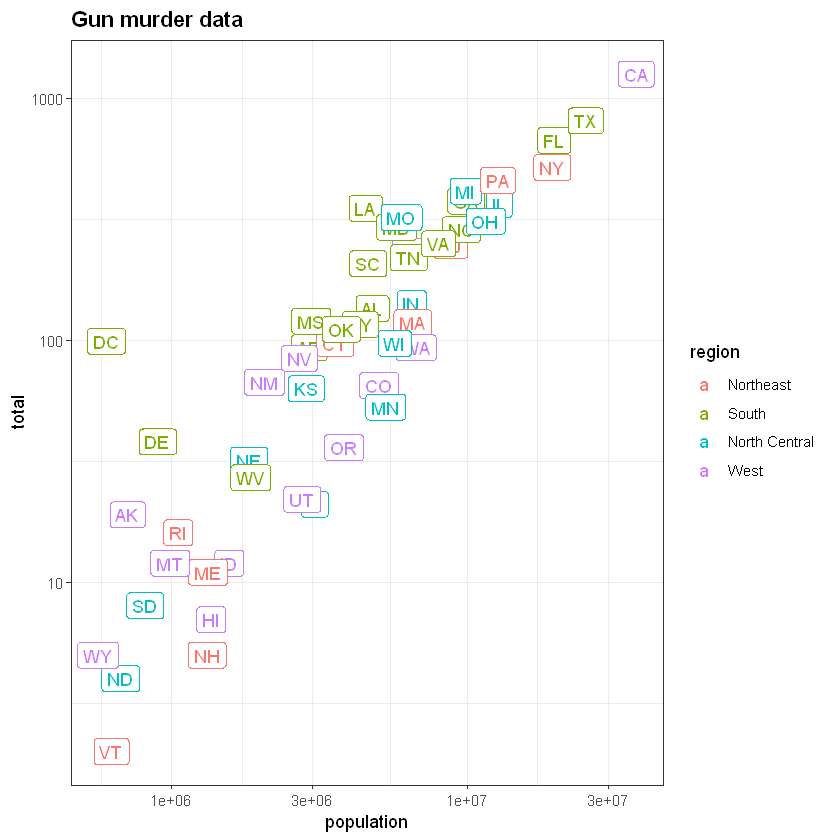

In [42]:
p + scale_x_log10() +
    scale_y_log10() +
    ggtitle("Gun murder data")